http://scikit-learn.org/stable/tutorial/text_analytics/working_with_text_data.html 

In [2]:
import numpy as np  
import pandas as pd 
import math

In [3]:
# Tells matplotlib to display images inline instead of a new window
%matplotlib inline
import matplotlib.pyplot as plt

In [200]:
datasetFilePath = "../../crimesInChicagoData/Unsupervised-MachineLearning/finalProject/year2001_10clusters.csv"
centroidsInfoFilePath = "../../crimesInChicagoData/Unsupervised-MachineLearning/finalProject/year2001_10clusterCentroids.csv"
clusterColumnName = 'clusters_10'
numClusters = 10

In [201]:
clusters = pd.read_csv(datasetFilePath)

In [202]:
clusters.head()

,Unnamed: 0,index,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Month,Day,Hour,index.1,clusters_10
0,0,6,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,True,True,5.0,2001.0,1,1,11,0,0
1,1,17,1753,OFFENSE INVOLVING CHILDREN,SEX ASSLT OF CHILD BY FAM MBR,RESIDENCE,True,False,8.0,2001.0,1,1,0,1,4
2,2,18,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False,9.0,2001.0,1,1,0,2,8
3,3,20,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,True,False,7.0,2001.0,6,16,8,3,5
4,4,25,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,15.0,2001.0,6,1,8,4,9


In [203]:
clusters = clusters.drop(['Unnamed: 0', 'index'], axis =1 )

In [204]:
clusters 

,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Month,Day,Hour,index.1,clusters_10
0,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,True,True,5.0,2001.0,1,1,11,0,0
1,1753,OFFENSE INVOLVING CHILDREN,SEX ASSLT OF CHILD BY FAM MBR,RESIDENCE,True,False,8.0,2001.0,1,1,0,1,4
2,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False,9.0,2001.0,1,1,0,2,8
3,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,True,False,7.0,2001.0,6,16,8,3,5
4,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,15.0,2001.0,6,1,8,4,9
5,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,True,14.0,2001.0,7,25,10,5,1
6,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,7.0,2001.0,6,23,20,6,0
7,0842,THEFT,AGG: FINANCIAL ID THEFT,OTHER,False,False,8.0,2001.0,1,1,0,7,8
8,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,False,4.0,2001.0,5,1,0,8,7
9,0842,THEFT,AGG: FINANCIAL ID THEFT,RESIDENCE,False,False,7.0,2001.0,10,1,0,9,9


In [205]:
clusters.shape

(568517, 13)

# Training and Test Data Subset 

In [206]:
import random 
random.seed(1)

In [207]:
def subsetData(df, percentage): 
    msk = np.random.rand(len(df)) < percentage
    train = df[msk]
    test = df[~msk]
    return train, test

In [208]:
splitData = subsetData(clusters, 0.7)

In [209]:
train = splitData[0]

In [210]:
test = splitData[1]

In [211]:
len(train)

398804

In [212]:
len(test)

169713

# Choosing Training & Test data 

In [213]:
def chooseData(columnName, df):
    selectedData = df[columnName].values
    return selectedData

In [214]:
train_x_description = chooseData('Description', train)

In [215]:
train_y_description = chooseData(clusterColumnName, train)

In [216]:
test_x_description = chooseData('Description', test)

In [217]:
test_y_description = chooseData(clusterColumnName, test)

# Tokenizing text with scikit-learn

In [220]:
from sklearn.feature_extraction.text import CountVectorizer

In [221]:
from sklearn.feature_extraction.text import TfidfTransformer

In [222]:
def tokenizeText(train_x, test_x):
    count_vect = CountVectorizer()
    train_counts = count_vect.fit_transform(train_x)
    tfidf_transformer = TfidfTransformer()
    train_x_tfidf = tfidf_transformer.fit_transform(train_counts)
    test_counts = count_vect.transform(test_x)
    test_x_tfidf = tfidf_transformer.transform(test_counts)
    
    return count_vect, train_counts, tfidf_transformer, train_x_tfidf, test_counts, test_x_tfidf

In [223]:
tokenizeInfo = tokenizeText(train_x_description, test_x_description)

In [224]:
count_vect_description = tokenizeInfo[0]
train_counts_description = tokenizeInfo[1]
tfidf_transformer_description = tokenizeInfo[2]
train_x_tfidf_description = tokenizeInfo[3]
test_counts_description = tokenizeInfo[4]
test_x_tfidf_description = tokenizeInfo[5]

# Training a Classifier

In [225]:
from sklearn.naive_bayes import MultinomialNB

In [226]:
def trainClassifier(train_x_tfidf, train_y, test_x_tfidf):
    clf = MultinomialNB().fit(train_x_tfidf, train_y)
    predicted = clf.predict(test_x_tfidf)
    #for test_row, cluster in zip(test_x, predicted): 
    #print('%r => %s' % (test_row, train_y[cluster]))
    
    return clf, predicted

In [227]:
classifierInfo = trainClassifier(train_x_tfidf_description, train_y_description, test_x_tfidf_description)

In [228]:
clf_description = classifierInfo[0]
predicted_description = classifierInfo[1]

In [229]:
clf_description

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [230]:
predicted_description

array([0, 2, 0, ..., 1, 0, 2])

# Evaluation of the Performance on the Test Set

In [231]:
def evaluateTestPerformance(predicted, test_y):
    print("The test has an accuracy of: ")
    print((np.mean(predicted == test_y)))

In [232]:
evaluateTestPerformance(predicted_description, test_y_description)

The test has an accuracy of: 
0.612622486197


# SVM Machine to Improve Performance on Test Set

In [233]:
from sklearn.linear_model import SGDClassifier 

In [234]:
def improveWithSVM(train_x_tfidf, train_y, test_x_tfidf): 
    svm_clf = SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42,max_iter=5, tol=None)
    print(svm_clf.fit(train_x_tfidf, train_y)) 
    print(svm_clf.coef_)
    svm_predicted = svm_clf.predict(test_x_tfidf)
    
    return svm_clf, svm_predicted

In [235]:
svmInfo = improveWithSVM(train_x_tfidf_description, train_y_description, test_x_tfidf_description)

SGDClassifier(alpha=0.001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)
[[ -2.58748927e-01   9.58783937e-03   0.00000000e+00 ...,  -1.47955009e-02
   -5.07998480e-03  -8.50554905e-03]
 [  0.00000000e+00  -2.81995276e-04  -2.61197373e-04 ...,  -7.24510212e-04
   -2.53999240e-04  -9.11308827e-04]
 [  7.48181027e-18  -2.81995276e-04   0.00000000e+00 ...,   3.68583827e-04
    0.00000000e+00   3.03769609e-04]
 ..., 
 [  0.00000000e+00   0.00000000e+00  -3.91796060e-03 ...,  -3.62255106e-04
   -2.53999240e-04   0.00000000e+00]
 [  0.00000000e+00  -2.53795748e-03  -3.39556585e-03 ...,  -7.18181492e-03
   -3.04799088e-03  -4.86031374e-03]
 [  0.00000000e+00  -2.81995276e-04  -3.91796060e-03 ...,   1.81127553e-03
    0.00000000e+00   7.59424022e-03]]


In [236]:
svm_clf_description = svmInfo[0]
svm_predicted_description = svmInfo[1]

In [264]:
evaluateTestPerformance(svm_predicted_description, test_y_description)

The test has an accuracy of: 
0.581322585777


In [238]:
from sklearn import metrics

In [239]:
def createTargetNames(numClusters):
    clusterNames = []
    for i in range(numClusters):
        clusterName = "cluster_"+str(i)
        clusterNames.append(clusterName)
    return clusterNames

In [240]:
targetNames = createTargetNames(numClusters)
targetNames

['cluster_0',
 'cluster_1',
 'cluster_2',
 'cluster_3',
 'cluster_4',
 'cluster_5',
 'cluster_6',
 'cluster_7',
 'cluster_8',
 'cluster_9']

In [241]:
def showMetrics(test_y, svm_predicted, targetNames):
    print(metrics.classification_report(test_y, svm_predicted, target_names = targetNames))
    print(metrics.confusion_matrix(test_y, svm_predicted))

In [242]:
showMetrics(test_y_description, svm_predicted_description, targetNames)

             precision    recall  f1-score   support

  cluster_0       0.62      0.64      0.63     26577
  cluster_1       0.37      0.08      0.13     20196
  cluster_2       0.28      0.27      0.28     16693
  cluster_3       0.34      0.69      0.46     18608
  cluster_4       0.69      0.78      0.73     20910
  cluster_5       0.52      0.60      0.56      8992
  cluster_6       0.08      0.06      0.07      6807
  cluster_7       0.89      0.74      0.81     12992
  cluster_8       0.87      0.84      0.85     25671
  cluster_9       0.97      0.77      0.86     12267

avg / total       0.59      0.58      0.57    169713

[[17142   574  3038   759  1653   893  1088   279  1138    13]
 [  799  1632  1444 14109   334   630   999    35   204    10]
 [ 1599  1118  4537  6660   875   686   694   154   359    11]
 [ 1123   297  2061 12830   685   365   783   164   297     3]
 [ 1024    61   610   219 16275  1601   543   233   310    34]
 [  389    33   227   101  2455  5369   239   

# Grid Search Parameter Tuning

In [243]:
from sklearn.model_selection import GridSearchCV

In [244]:
def gridSearchParamTune(svm_clf, train_counts, train_y):
    parameters = {'alpha': (1e-2, 1e-3)}
    gs_clf = GridSearchCV(svm_clf, parameters)
    gs_clf = gs_clf.fit(train_counts, train_y)
    print(gs_clf.best_params_)
    print(gs_clf.best_score_)
    return gs_clf

In [245]:
gs_clf_description = gridSearchParamTune(svm_clf_description, train_counts_description, train_y_description)

{'alpha': 0.01}
0.58797053189


# Visualizing The Results
https://buhrmann.github.io/tfidf-analysis.html

In [246]:
def top_tfidf_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

In [247]:
def top_feats_in_doc(Xtr, features, row_id, top_n=25):
    ''' Top tfidf features in specific document (matrix row) '''
    row = np.squeeze(Xtr[row_id].toarray())
    return top_tfidf_feats(row, features, top_n)

In [248]:
def top_feats_by_class(Xtr, y, features, min_tfidf=0.1, top_n=10):
    ''' Return a list of dfs, where each df holds top_n features and their mean tfidf value
        calculated across documents with the same class label. '''
    dfs = []
    labels = np.unique(y)
    for label in labels:
        ids = np.where(y==label)
        feats_df = top_mean_feats(Xtr, features, ids, min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)
    return dfs

In [249]:
def top_mean_feats(Xtr, features, grp_ids=None, min_tfidf=0.1, top_n=25):
    ''' Return the top n features that on average are most important amongst documents in rows
        indentified by indices in grp_ids. '''
    if grp_ids:
        D = Xtr[grp_ids].toarray()
    else:
        D = Xtr.toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

In [250]:
def plot_tfidf_classfeats_h(dfs):
    ''' Plot the data frames returned by the function plot_tfidf_classfeats(). '''
    fig = plt.figure(figsize=(12, 9), facecolor="w")
    x = np.arange(len(dfs[0]))
    for i, df in enumerate(dfs):
        ax = fig.add_subplot(1, len(dfs), i+1)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_xlabel("Mean Tf-Idf Score", labelpad=16, fontsize=14)
        ax.set_title("label = " + str(df.label), fontsize=16)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.tfidf, align='center', color='#3F5D7D')
        ax.set_yticks(x)
        ax.set_ylim([-1, x[-1]+1])
        yticks = ax.set_yticklabels(df.feature)
        plt.subplots_adjust(bottom=0.09, right= 10, left=0.15, top=0.8, wspace=0.52)
    plt.show()

In [251]:
def visualizeTfidf(count_vect, train_x_tfidf, train_y):
    features=count_vect.get_feature_names()
    dfs = top_feats_by_class(train_x_tfidf, train_y, features)
    plot_tfidf_classfeats_h(dfs)

In [252]:
pd.set_option('display.max_columns', None)

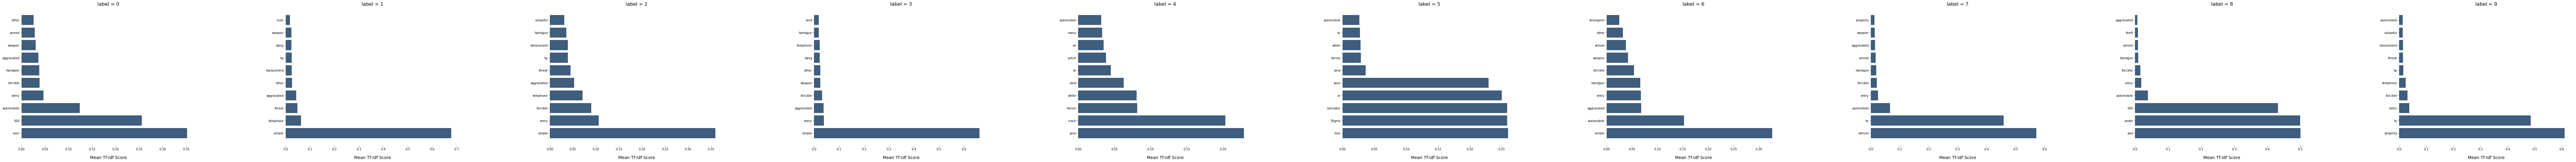

In [253]:
visualizeTfidf(count_vect_description, train_x_tfidf_description, train_y_description)

In [254]:
centroidsLabels = pd.read_csv(centroidsInfoFilePath) 

In [255]:
centroidsLabels

,Unnamed: 0,index,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Month,Day,Hour
0,0,6,810,THEFT,OVER $500,STREET,False,False,5.0,2001.0,6,29,22
1,1,32,460,BATTERY,SIMPLE,RESIDENCE,False,True,25.0,2001.0,7,21,21
2,2,1078,560,ASSAULT,SIMPLE,RESIDENCE,False,False,7.0,2001.0,2,6,17
3,3,132,460,BATTERY,SIMPLE,RESIDENCE,False,False,18.0,2001.0,12,4,9
4,4,17,2027,NARCOTICS,POSS: CRACK,STREET,True,False,2.0,2001.0,2,26,19
5,5,20,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,STREET,True,False,7.0,2001.0,4,18,20
6,6,382,560,ASSAULT,SIMPLE,STREET,False,False,14.0,2001.0,11,20,16
7,7,1193,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,3.0,2001.0,5,6,0
8,8,335,820,THEFT,$500 AND UNDER,STREET,False,False,8.0,2001.0,1,19,15
9,9,118,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,10.0,2001.0,10,1,21


# Looking at Location Description

In [257]:
train_x_location = chooseData('Location Description', train)
test_x_location = chooseData('Location Description', test)

In [259]:
tokenizeInfo_location = tokenizeText(train_x_location, test_x_location)

In [260]:
count_vect_location = tokenizeInfo_location[0]
train_counts_location = tokenizeInfo_location[1]
tfidf_transformer_location = tokenizeInfo_location[2]
train_x_tfidf_location = tokenizeInfo_location[3]
test_counts_location = tokenizeInfo_location[4]
test_x_tfidf_location = tokenizeInfo_location[5]

In [262]:
classifierInfo_location = trainClassifier(train_x_tfidf_location, train_y_description, test_x_tfidf_location)
clf_location = classifierInfo_location[0]
predicted_location = classifierInfo_location[1]

In [263]:
evaluateTestPerformance(predicted_location, test_y_description)

The test has an accuracy of: 
0.273850559474


In [265]:

svmInfo_location = improveWithSVM(train_x_tfidf_location, train_y_description, test_x_tfidf_location)

svm_clf_location = svmInfo_location[0]
svm_predicted_location = svmInfo_location[1]
evaluateTestPerformance(svm_predicted_location, test_y_description)


SGDClassifier(alpha=0.001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)
[[ -1.62127969e-02  -1.27665516e-02  -1.45570060e-02 ...,  -7.62526231e-03
   -1.25101652e-02  -2.50727507e-03]
 [ -2.75645642e-18  -3.54626434e-04   2.02622107e-04 ...,  -8.97089683e-04
   -1.18133846e-17   0.00000000e+00]
 [ -3.50546959e-03  -2.12775861e-03  -2.59662607e-03 ...,  -1.34563452e-03
   -3.00873009e-03  -2.50727507e-03]
 ..., 
 [ -1.45698411e-17   2.24060529e-17   2.26029426e-17 ...,   1.53574000e-18
   -7.49561501e-04   0.00000000e+00]
 [ -4.82002069e-02  -4.36190514e-02  -4.40279532e-02 ...,  -2.71369629e-02
   -3.75829159e-02  -2.50727507e-03]
 [ -8.76367398e-04  -3.54626434e-04  -4.65208560e-04 ...,  -2.24272421e-04
   -7.49561501e-04   2.50727507e-03]]
Th

In [266]:
showMetrics(test_y_description, svm_predicted_location, targetNames)

             precision    recall  f1-score   support

  cluster_0       0.26      0.08      0.12     26577
  cluster_1       0.02      0.00      0.00     20196
  cluster_2       0.15      0.03      0.05     16693
  cluster_3       0.15      0.12      0.14     18608
  cluster_4       0.47      0.11      0.18     20910
  cluster_5       0.05      0.05      0.05      8992
  cluster_6       0.05      0.00      0.00      6807
  cluster_7       0.17      0.69      0.27     12992
  cluster_8       0.17      0.36      0.23     25671
  cluster_9       0.11      0.18      0.14     12267

avg / total       0.18      0.17      0.13    169713

[[ 2053   172   341  1605   359  1440    69 10903  6348  3287]
 [  256    16   449  1516   333   311    29  2763 10640  3883]
 [  654    82   463  1471   287  1402    43   834  9343  2114]
 [  817   150   470  2326   704  1719    53  3451  6391  2527]
 [  549    73   382  3321  2383   930    38  9224  2672  1338]
 [  202    15   179  1533   439   483    13  4

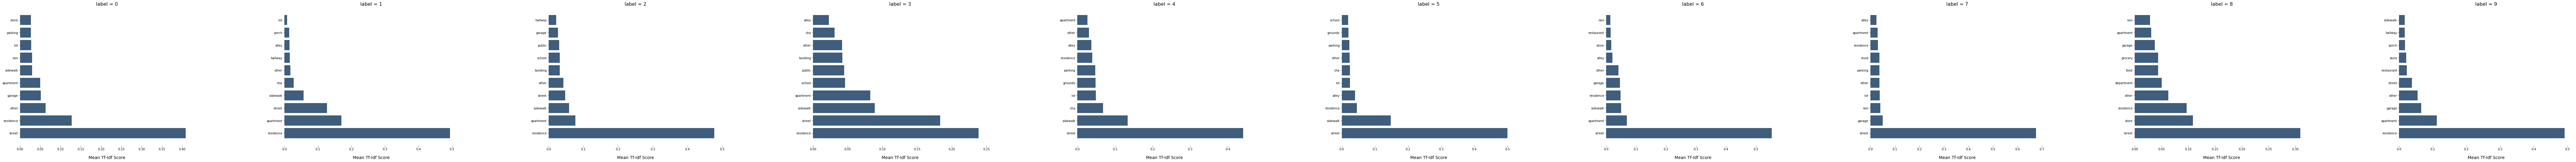

In [267]:
visualizeTfidf(count_vect_location, train_x_tfidf_location, train_y_description)

# Looking at District Description 

In [274]:
def analyzeTfidf(train_x, test_x, train_y, test_y):
    tokenizeInfo = tokenizeText(train_x, test_x)
    count_vect  = tokenizeInfo[0]
    train_counts  = tokenizeInfo[1]
    tfidf_transformer  = tokenizeInfo[2]
    train_x_tfidf  = tokenizeInfo[3]
    test_counts  = tokenizeInfo[4]
    test_x_tfidf  = tokenizeInfo[5]
    classifierInfo  = trainClassifier(train_x_tfidf, train_y, test_x_tfidf)
    clf  = classifierInfo[0]
    predicted  = classifierInfo[1]
    evaluateTestPerformance(predicted, test_y)
    visualizeTfidf(count_vect, train_x_tfidf, train_y)

In [282]:
train_x_primaryType= chooseData('Primary Type', train)
test_x_primaryType = chooseData('Primary Type', test)

The test has an accuracy of: 
0.4861265784


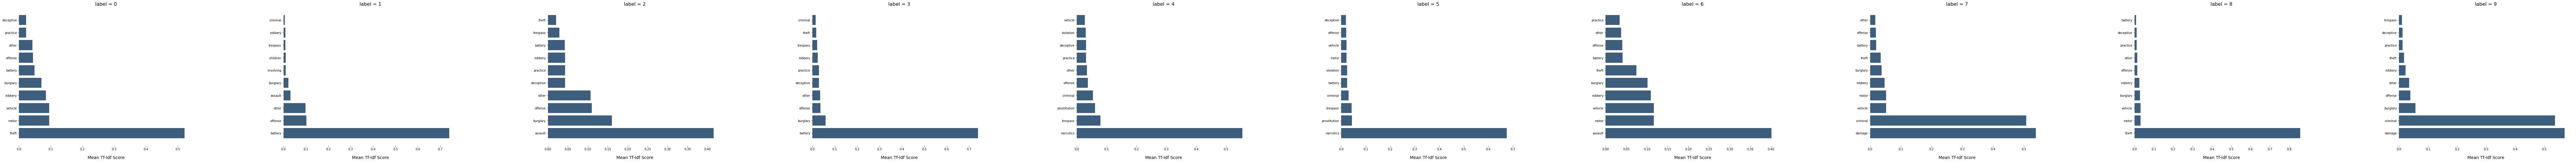

In [284]:
analyzeTfidf(train_x_primaryType, test_x_primaryType, train_y_description, test_y_description)

In [277]:
clusters.head()

,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,District,Year,Month,Day,Hour,index.1,clusters_10
0,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,True,True,5.0,2001.0,1,1,11,0,0
1,1753,OFFENSE INVOLVING CHILDREN,SEX ASSLT OF CHILD BY FAM MBR,RESIDENCE,True,False,8.0,2001.0,1,1,0,1,4
2,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,False,9.0,2001.0,1,1,0,2,8
3,1754,OFFENSE INVOLVING CHILDREN,AGG SEX ASSLT OF CHILD FAM MBR,RESIDENCE,True,False,7.0,2001.0,6,16,8,3,5
4,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,RESIDENCE,False,False,15.0,2001.0,6,1,8,4,9


The test has an accuracy of: 
0.183674792149


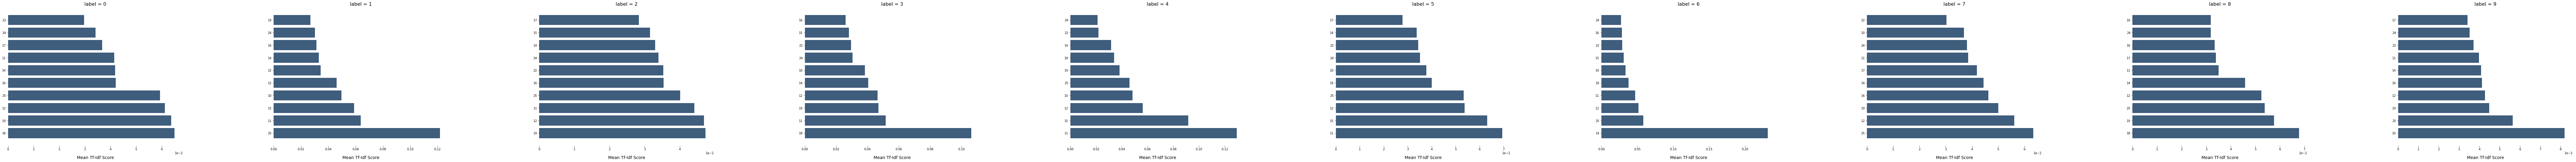

In [294]:
train_x_district = chooseData('District', train).astype(int).astype('str')
test_x_district = chooseData('District', test).astype(int).astype('str')

analyzeTfidf(train_x_district, test_x_district, train_y_description, test_y_description)

The test has an accuracy of: 
0.167388473482


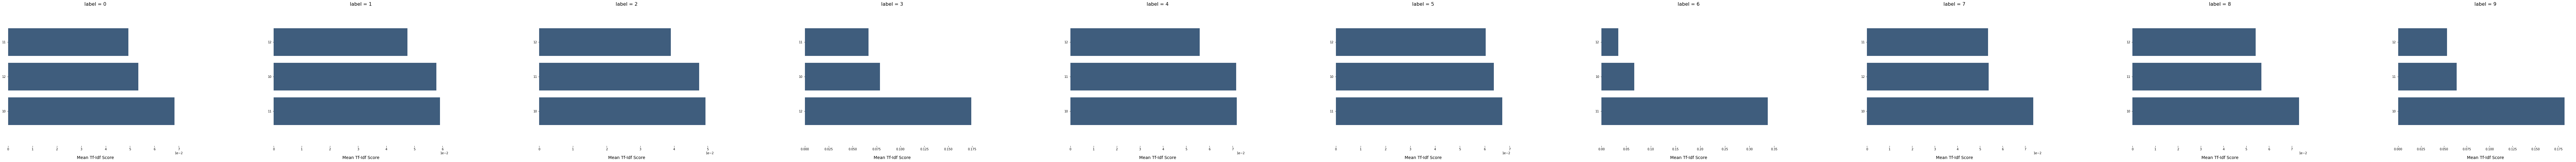

In [295]:
train_x_month = chooseData('Month', train).astype(int).astype('str')
test_x_month = chooseData('Month', test).astype(int).astype('str')

analyzeTfidf(train_x_month, test_x_month, train_y_description, test_y_description)

The test has an accuracy of: 
0.168767271806


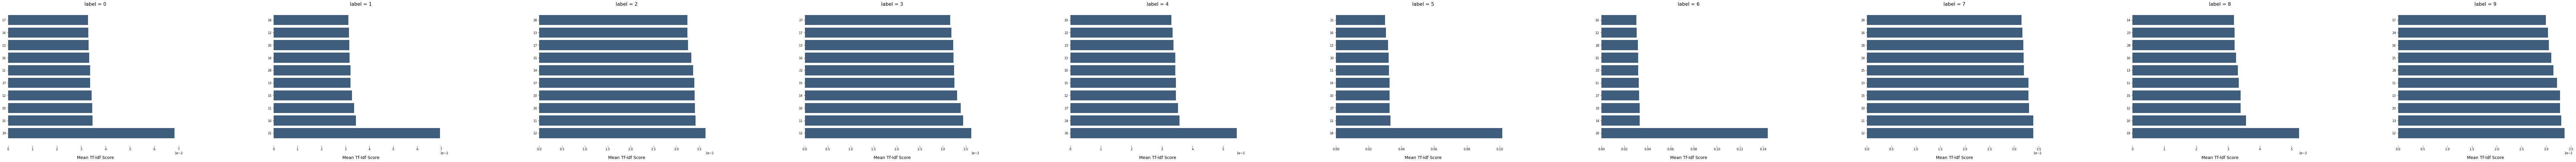

In [296]:
train_x_day = chooseData('Day', train).astype(int).astype('str')
test_x_day = chooseData('Day', test).astype(int).astype('str')

analyzeTfidf(train_x_day, test_x_day, train_y_description, test_y_description)

The test has an accuracy of: 
0.200862632798


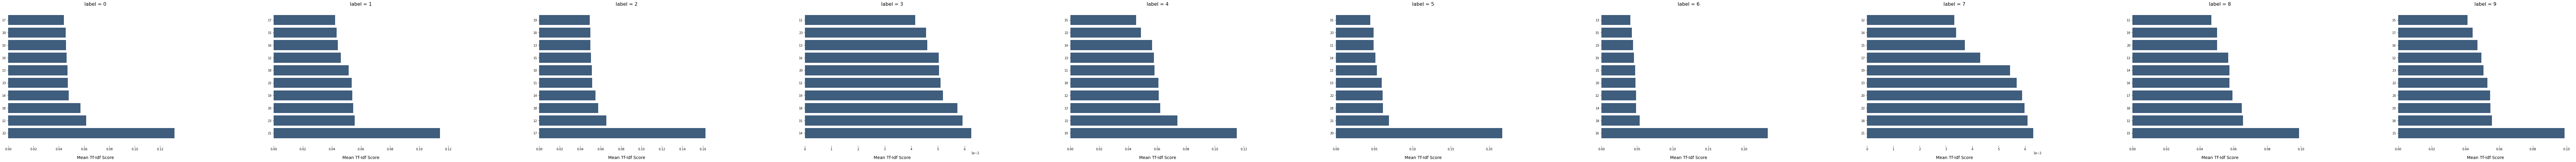

In [297]:
train_x_hour = chooseData('Hour', train).astype(int).astype('str')
test_x_hour = chooseData('Hour', test).astype(int).astype('str')

analyzeTfidf(train_x_hour, test_x_hour, train_y_description, test_y_description)

In [298]:
train_y_district = chooseData('District', train).astype(int).astype('str')
test_y_district = chooseData('District', test).astype(int).astype('str')

The test has an accuracy of: 
0.0995386328684


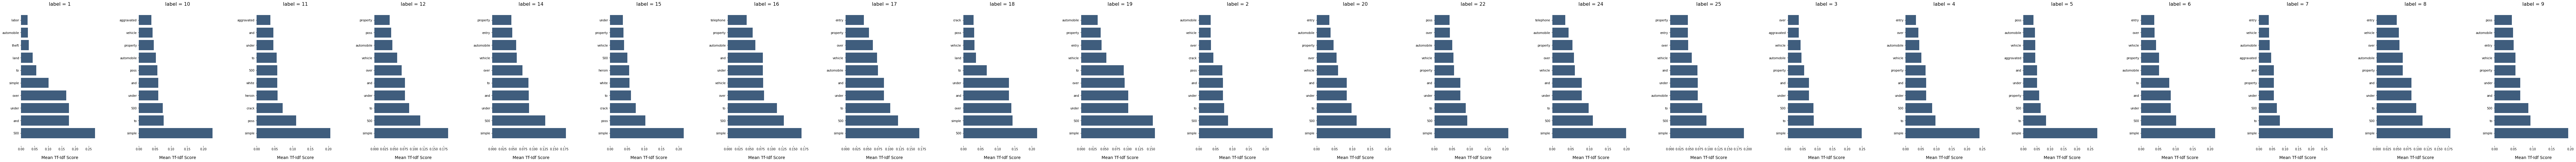

In [299]:
analyzeTfidf(train_x_description, test_x_description, train_y_district, test_y_district)